In [1]:
with open('Москва_2021.txt', 'r') as infile:
    dataraw = infile.read()

data = [int(item) for item in dataraw.splitlines()]
k = 7
n = len(data)


In [2]:
import math
h = (max(data) - min(data)) / k
print(h) # almost 9
h = math.ceil(h)

intervals = [(min(data) + i*h, min(data) + (i+1)*h) for i in range(k)]
print(intervals)

intervals_frequencies = {interval: 0 for interval in intervals}

for value in data:
    for interval in intervals:
        if interval[0] <= value < interval[1]:
            intervals_frequencies[interval] += 1
            break

print(intervals_frequencies)

infr = list(intervals_frequencies.items())
print(infr)

8.428571428571429
[(14, 23), (23, 32), (32, 41), (41, 50), (50, 59), (59, 68), (68, 77)]
{(14, 23): 4811, (23, 32): 9476, (32, 41): 7243, (41, 50): 7951, (50, 59): 1140, (59, 68): 1472, (68, 77): 330}
[((14, 23), 4811), ((23, 32), 9476), ((32, 41), 7243), ((41, 50), 7951), ((50, 59), 1140), ((59, 68), 1472), ((68, 77), 330)]


In [3]:
average = sum([(item[0][0]+item[0][1])/2*item[1] for item in infr])/n
variance = sum([((item[0][0]+item[0][1])/2 - average)**2 * item[1] for item in infr])/n
stddev = variance**0.5



modal_interval = max(infr, key=lambda x: x[1])
modal_interval_index = infr.index(modal_interval)
mode = modal_interval[0][0] + h * (modal_interval[1] - (infr[modal_interval_index - 1][1])) / ((modal_interval[1] - (infr[modal_interval_index - 1][1])) + (modal_interval[1] - (infr[modal_interval_index + 1][1])))

sumhalved = sum([item[1] for item in infr])/2
total = 0
median_interval = None
for interval, freq in infr:
    total += freq
    if total >= sumhalved:
        median_interval = interval
        break
median_interval_index = infr.index((median_interval, intervals_frequencies[median_interval]))
median = median_interval[0] + h * (sumhalved - (total - intervals_frequencies[median_interval])) / intervals_frequencies[median_interval]

range_val = infr[-1][0][1] - infr[0][0][0]

variation_coefficient = stddev/average


print(f'Среднее {average:.3f}')
print(f'Дисперсия {variance:.3f}')
print(f'Среднеквадратичное отклонение {stddev:.3f}')
print(f'Мода {mode:.3f}')
print(f'Медиана {median:.3f}')
print(f'Размах {range_val:.3f}')
print(f'Коэфф вариации {variation_coefficient*100:.3f}%')
print(f'Максимальное {max(infr, key=lambda x: x[0][1])[0][1]}')
print(f'Минимальное {min(infr, key=lambda x: x[0][0])[0][0]}')


Среднее 35.631
Дисперсия 148.536
Среднеквадратичное отклонение 12.188
Мода 29.087
Медиана 34.391
Размах 63.000
Коэфф вариации 34.205%
Максимальное 77
Минимальное 14


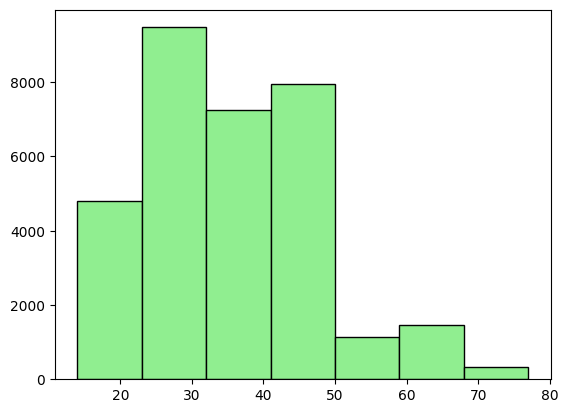

In [4]:
import matplotlib.pyplot as plt

values, frequencies = zip(*infr)
lefts = [a for a, b in values]
widths = [b - a for a, b in values]

plt.bar(lefts, frequencies, width=widths, align="edge",
        color="lightgreen", edgecolor="black")
plt.show()